## Data Loading:

In [71]:
import pandas as pd

df = pd.read_csv('GlobalLandTemperaturesByState.csv')

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [72]:
df['State'].unique()

array(['Acre', 'Adygey', 'Aga Buryat', 'Alabama', 'Alagoas', 'Alaska',
       'Alberta', 'Altay', 'Amazonas', 'Amur', 'Andaman And Nicobar',
       'Andhra Pradesh', 'Anhui', 'Arizona', 'Arkansas', "Arkhangel'Sk",
       'Arunachal Pradesh', 'Assam', "Astrakhan'",
       'Australian Capital Territory', 'Bahia', 'Bashkortostan',
       'Beijing', 'Belgorod', 'Bihar', 'British Columbia', 'Bryansk',
       'Buryat', 'California', 'Chandigarh', 'Chechnya', 'Chelyabinsk',
       'Chhattisgarh', 'Chita', 'Chongqing', 'Chukot', 'Chuvash',
       'City Of St. Petersburg', 'Colorado', 'Connecticut',
       'Dadra And Nagar Haveli', 'Dagestan', 'Daman And Diu', 'Delaware',
       'Delhi', 'District Of Columbia', 'Distrito Federal', 'Evenk',
       'Florida', 'Fujian', 'Gansu', 'Georgia (State)', 'Goa',
       'Gorno Altay', 'Guangdong', 'Guangxi', 'Guizhou', 'Gujarat',
       'Hainan', 'Haryana', 'Hawaii', 'Hebei', 'Heilongjiang', 'Henan',
       'Himachal Pradesh', 'Hubei', 'Hunan', 'Idaho', 'I

In [73]:
df = df[df['State'] == 'Kerala'].reset_index(drop=True)


## EDA and Preprocessing

In [74]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1796-01-01,25.770,2.118,Kerala,India
1,1796-02-01,26.455,1.210,Kerala,India
2,1796-03-01,27.054,2.257,Kerala,India
3,1796-04-01,28.240,1.542,Kerala,India
4,1796-05-01,28.018,1.108,Kerala,India


In [75]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
2608,2013-05-01,29.335,0.406,Kerala,India
2609,2013-06-01,25.927,0.446,Kerala,India
2610,2013-07-01,25.570,0.413,Kerala,India
2611,2013-08-01,26.167,0.408,Kerala,India
2612,2013-09-01,NaN,NaN,Kerala,India


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2613 non-null   object 
 1   AverageTemperature             2484 non-null   float64
 2   AverageTemperatureUncertainty  2484 non-null   float64
 3   State                          2613 non-null   object 
 4   Country                        2613 non-null   object 
dtypes: float64(2), object(3)
memory usage: 102.2+ KB


In [77]:
df['date'] = pd.to_datetime(df['dt'])
df.drop('dt',inplace=True,axis=1)
df.set_index('date', inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2613 entries, 1796-01-01 to 2013-09-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AverageTemperature             2484 non-null   float64
 1   AverageTemperatureUncertainty  2484 non-null   float64
 2   State                          2613 non-null   object 
 3   Country                        2613 non-null   object 
dtypes: float64(2), object(2)
memory usage: 102.1+ KB


In [79]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
date,,,,
1796-01-01,25.770,2.118,Kerala,India
1796-02-01,26.455,1.210,Kerala,India
1796-03-01,27.054,2.257,Kerala,India
1796-04-01,28.240,1.542,Kerala,India
1796-05-01,28.018,1.108,Kerala,India


In [80]:
df.shape

(2613, 4)

In [81]:
df.isnull().sum()

AverageTemperature               129
AverageTemperatureUncertainty    129
State                              0
Country                            0
dtype: int64

In [82]:
df['AverageTemperature'] = df['AverageTemperature'].interpolate(method='time')


In [83]:
df.columns

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [84]:
df.drop(['AverageTemperatureUncertainty', 'State',
       'Country'],inplace=True,axis=1)

# EDA

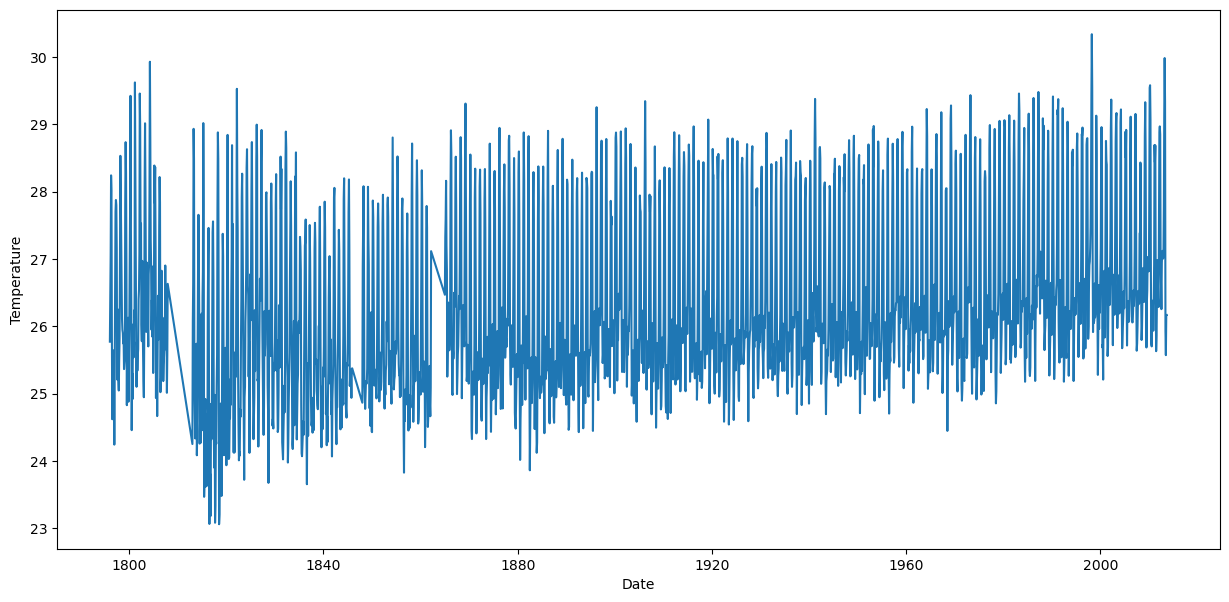

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

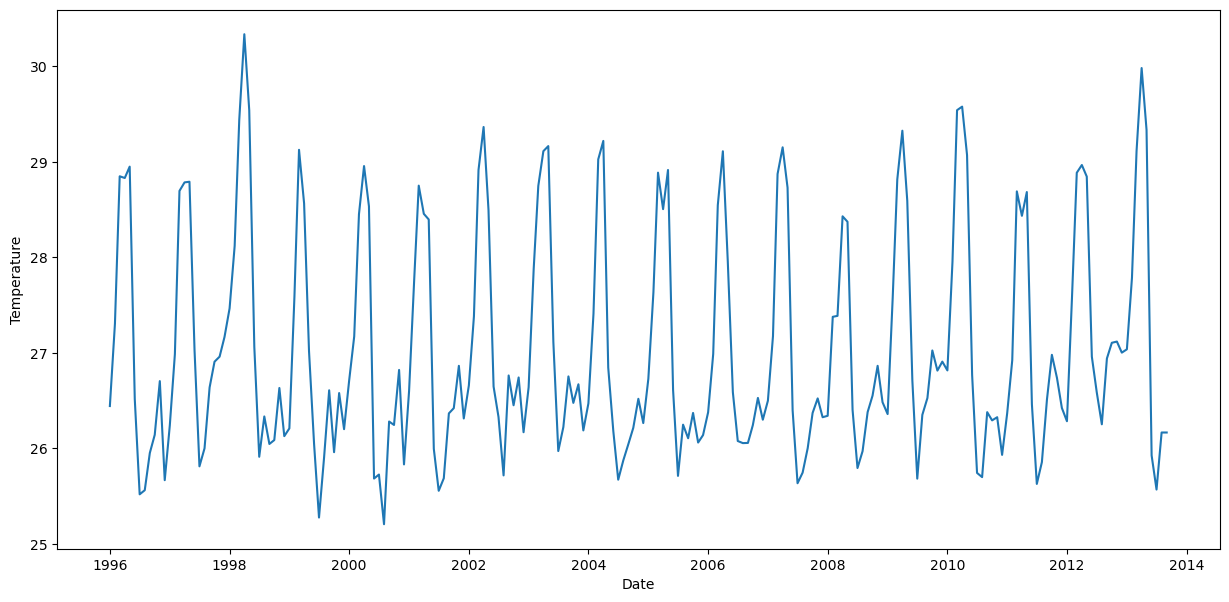

In [86]:
plt.figure(figsize=(15, 7))
plt.plot(df['AverageTemperature'][2400:])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

<Figure size 1500x600 with 0 Axes>

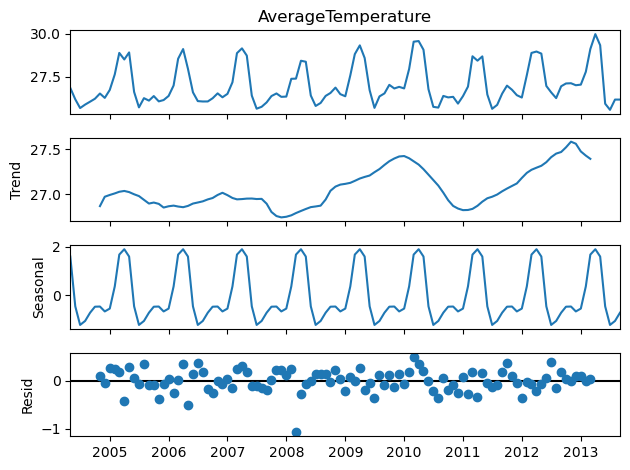

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15,6))
seasonal_decompose(df['AverageTemperature'][2500:]).plot()
plt.plot()
plt.show()

# Data Splitting(Train Test Split)

In [ ]:
size = int(len(df)*0.8)
train = df[:size]
test = df[size:]

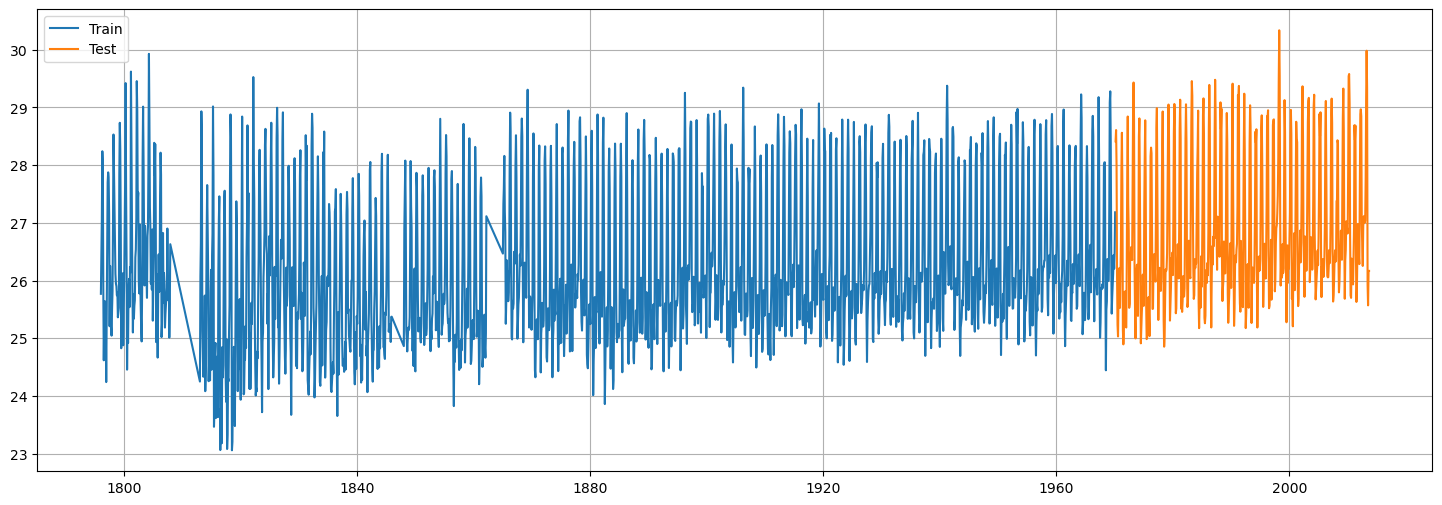

In [219]:
plt.figure(figsize=(18,6))
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA

### Stationarity Test

In [88]:
from statsmodels.tsa.stattools import adfuller

def adf(df):

    result = adfuller(df, autolag='AIC')
    adf_stat = result[0]
    p_value = result[1]

    print(p_value)
    if p_value < 0.5:
       print('Reject Null Hypothesis → Series is stationary')
    else:
        print('Fail to Reject Null Hypothesis → Series is non-stationary')

In [89]:
adf(df)

0.005362498486254278
Reject Null Hypothesis → Series is stationary


### PACF and ACF plots to Determine p and q

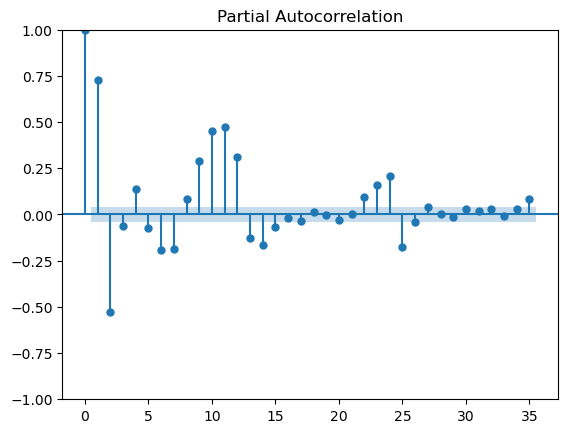

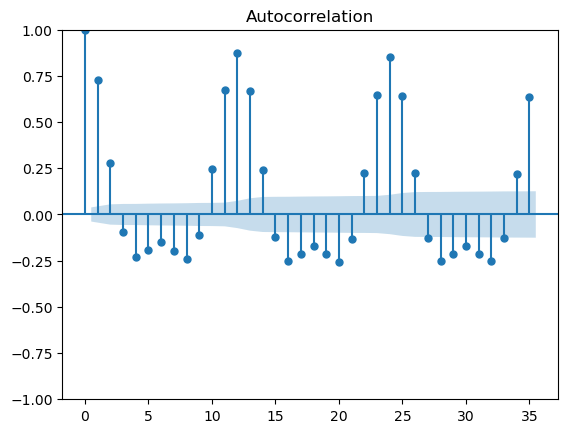

In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


plot_pacf(df)
plot_acf(df)
plt.show()

In [92]:
print(train.shape)
print(test.shape)

(2090, 1)
(523, 1)


# Model Training

In [203]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Function for evaluating and plotting the results

def evaluate(actual,predicted):

    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    smape = 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

    plt.figure(figsize=(16,7))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predicted, label='Predicted', color='red')
    plt.title('Actual VS Predicted')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.grid(True)
    plt.legend()
    plt.text(0.01, 0.96, f'sMAPE: {smape:.2f}%', transform=plt.gca().transAxes)
    plt.text(0.01, 0.91, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
    plt.text(0.01, 0.86, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)

    plt.show()

    print('MAE',+mae)

### Predicting the values

In [94]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax  import SARIMAX

arm = ARIMA(train, order=(1,1,1))
res = arm.fit()
forc = res.get_forecast(steps=len(test))
forci = forc.conf_int()

arima_forecast = forc.predicted_mean

/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 2090
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2718.544
Date:                Sat, 30 Aug 2025   AIC                           5443.087
Time:                        07:20:44   BIC                           5460.020
Sample:                    01-01-1796   HQIC                          5449.291
                         - 02-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0944      0.061      1.538      0.124      -0.026       0.215
ma.L1          0.2733      0.056      4.860      0.000       0.163       0.383
sigma2         0.7904      0.020     39.987      0.0

### ARIMA Results

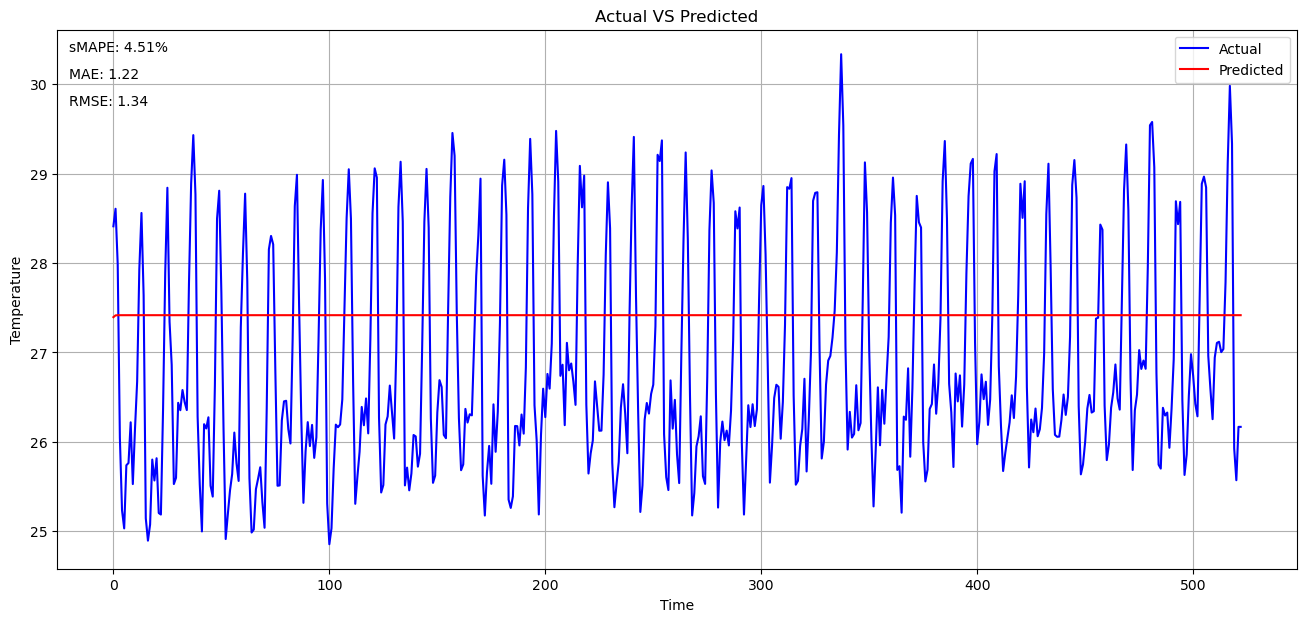

MAE 1.2204274136536846


In [204]:
evaluate(test,arima_forecast)

# SARIMAX

### Model Training

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

srm = SARIMAX(train,order=(1,1,1), seasonal_order=(1,1,1,12))
res = srm.fit()

/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [98]:
pred = res.get_forecast(steps = len(test))
cip = pred.conf_int()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                 2090
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1365.167
Date:                            Sat, 30 Aug 2025   AIC                           2740.334
Time:                                    07:20:47   BIC                           2768.527
Sample:                                01-01-1796   HQIC                          2750.666
                                     - 02-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4888      0.015     32.065      0.000       0.459       0.519
ma.L1         -0.9617      0.006   

### Results

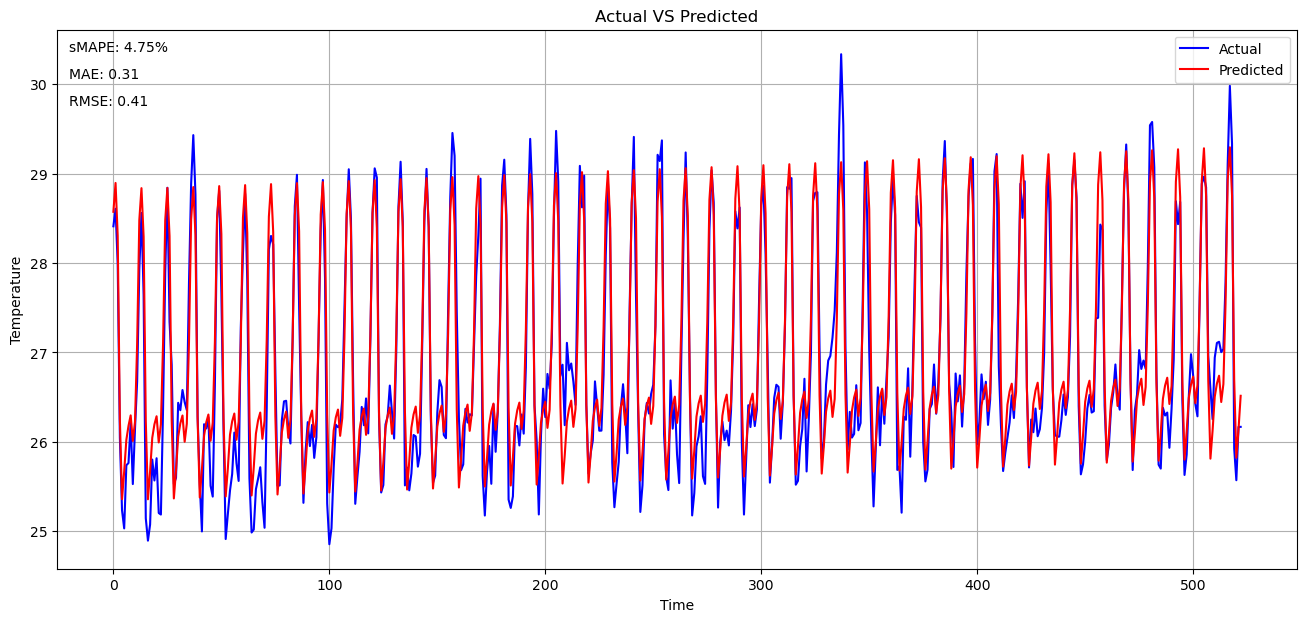

MAE 0.3070056094402699


In [220]:
sarima_forecast = pred.predicted_mean
evaluate(test,sarima_forecast)

# Exponential Smoothing


In [100]:
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing

model = ExponentialSmoothing(train,seasonal='add',trend='add',seasonal_periods=12)

res = model.fit()

/home/aswin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
exp_forecast = res.forecast(steps = len(test))


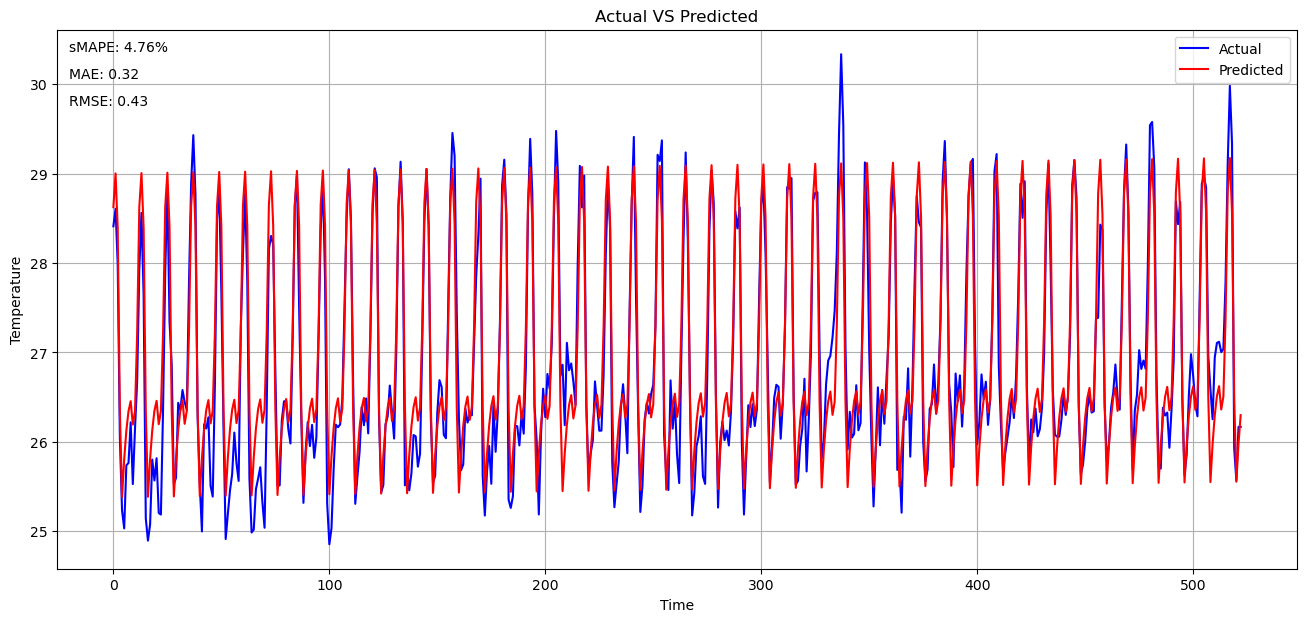

MAE 0.32453038887989755


In [221]:
evaluate(test,exp_forecast)

# Prophet

In [106]:
p_df = train.reset_index().rename(columns={'date':'ds','AverageTemperature':'y'})
t_df = test.reset_index().rename(columns={'date':'ds','AverageTemperature':'y'})

In [107]:


from prophet import Prophet

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False )

prophet_model.fit(p_df)


07:22:19 - cmdstanpy - INFO - Chain [1] start processing
07:22:20 - cmdstanpy - INFO - Chain [1] done processing


In [158]:
prophet_forc = prophet_model.predict(t_df)

In [205]:
prophet_forc.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-03-01,26.586966,27.594457,28.998471,26.586966,26.586966,1.730628,1.730628,1.730628,1.730628,1.730628,1.730628,0.0,0.0,0.0,28.317594
1,1970-04-01,26.587448,28.015959,29.458599,26.587448,26.587448,2.132215,2.132215,2.132215,2.132215,2.132215,2.132215,0.0,0.0,0.0,28.719663
2,1970-05-01,26.587915,27.505450,28.972740,26.587915,26.587915,1.657071,1.657071,1.657071,1.657071,1.657071,1.657071,0.0,0.0,0.0,28.244986
3,1970-06-01,26.588398,25.392361,26.893509,26.588398,26.588398,-0.422521,-0.422521,-0.422521,-0.422521,-0.422521,-0.422521,0.0,0.0,0.0,26.165877
4,1970-07-01,26.588865,24.689181,26.044709,26.588865,26.588865,-1.210397,-1.210397,-1.210397,-1.210397,-1.210397,-1.210397,0.0,0.0,0.0,25.378468


In [213]:
prophet_forecast = prophet_forc[['ds', 'yhat']]

prophet_forecast.set_index('ds',inplace=True)

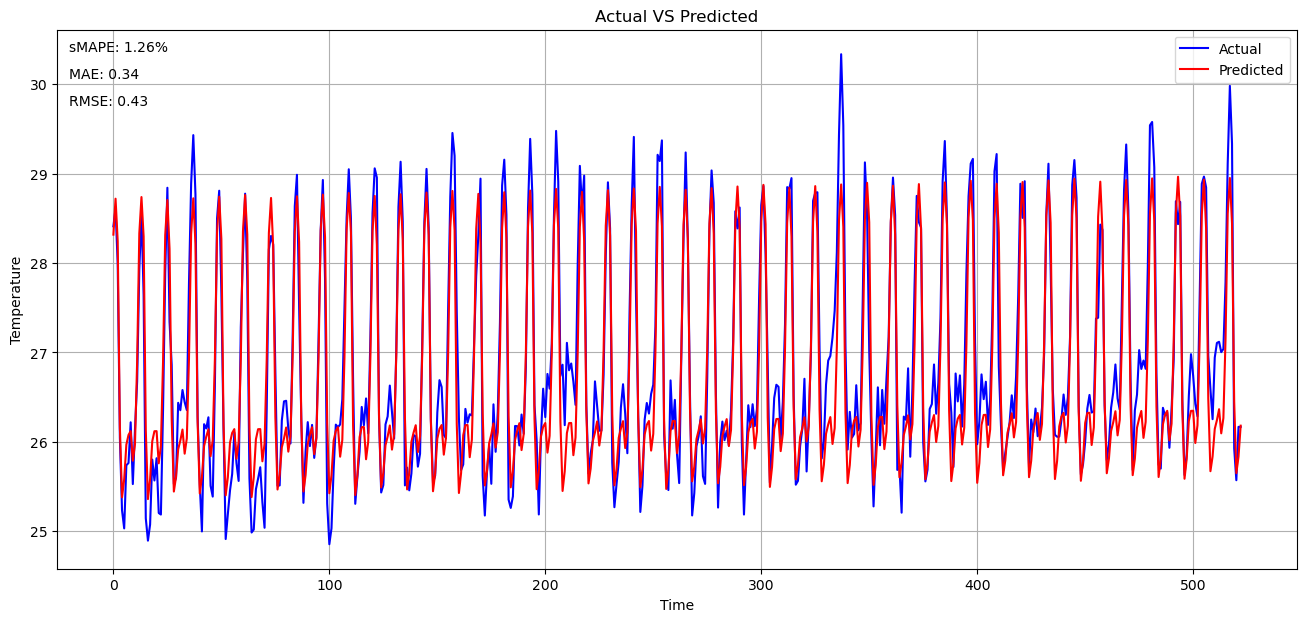

MAE 0.3396573201786338


In [214]:
evaluate(test,prophet_forecast)

# LSTM

#### Data Scaling and Formatting for LSTM

In [117]:
import numpy as np
import pandas as pd

data = df['AverageTemperature'].values.reshape(-1,1)
data.shape


(2613, 1)

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [119]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 100
X,y = create_sequences(data_scaled,seq_length)

In [120]:
train_size = int(len(data)*0.8)
X_train, X_test = X[:train_size],X[train_size:]
y_train, y_test = y[:train_size],y[train_size:]

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50


/home/aswin/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.1327
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0300
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0284
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0276
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0267
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0252
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0238
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0198
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0170
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0142
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0124
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0107
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0096
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0097
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0089
Epoch 16/50
33/

In [128]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  
forecast_lstm = y_pred
y_test_actual = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [152]:
test[100:].head()

,AverageTemperature
date,
1978-07-01,24.854
1978-08-01,25.033
1978-09-01,25.700
1978-10-01,26.192
1978-11-01,26.163


In [ ]:
# Adding Dates to the predicted values

forecast_lstm = np.array(forecast_lstm).flatten()

forecast_dates = pd.date_range(
    start="1978-07-01", 
    periods=len(forecast_lstm), 
    freq="M"   )

forecast_df = pd.DataFrame({
    "ds": forecast_dates,
    "forecast": forecast_lstm
})

print(forecast_df.head())
forecast_df.set_index('ds',inplace=True)

          ds   forecast
0 1978-07-31  24.632425
1 1978-08-31  24.967960
2 1978-09-30  25.411961
3 1978-10-31  25.760317
4 1978-11-30  25.824585


/tmp/ipykernel_11269/2348775286.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(


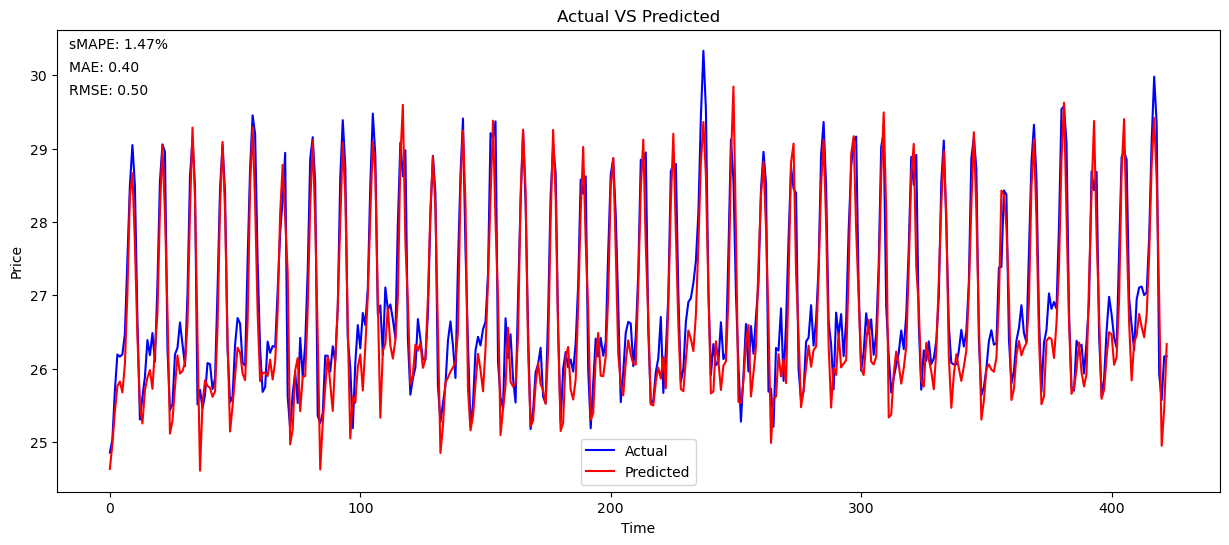

MAE 0.39525673767522734


In [154]:
evaluate(y_test_actual, y_pred)


In [131]:
last_100_scaled = data_scaled[-100:]  

X_input = last_100_scaled.reshape(1, 100, 1)


In [132]:
next_day_scaled = model.predict(X_input)
next_day_price = scaler.inverse_transform(next_day_scaled) 
print("Next predicted price:", next_day_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Next predicted price: 26.208473


In [215]:
future_days = 48
future_predictions = []

current_input = last_100_scaled.copy()

for _ in range(future_days):
    pred_scaled = model.predict(current_input.reshape(1,100,1))
    pred_price = scaler.inverse_transform(pred_scaled)[0][0]
    future_predictions.append(pred_price)
    
    current_input = np.append(current_input[1:], pred_scaled)
    current_input = current_input.reshape(100,1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

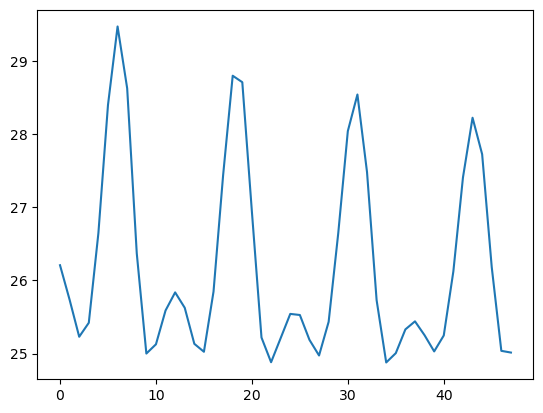

In [216]:
plt.plot(future_predictions)

# Model Comparison

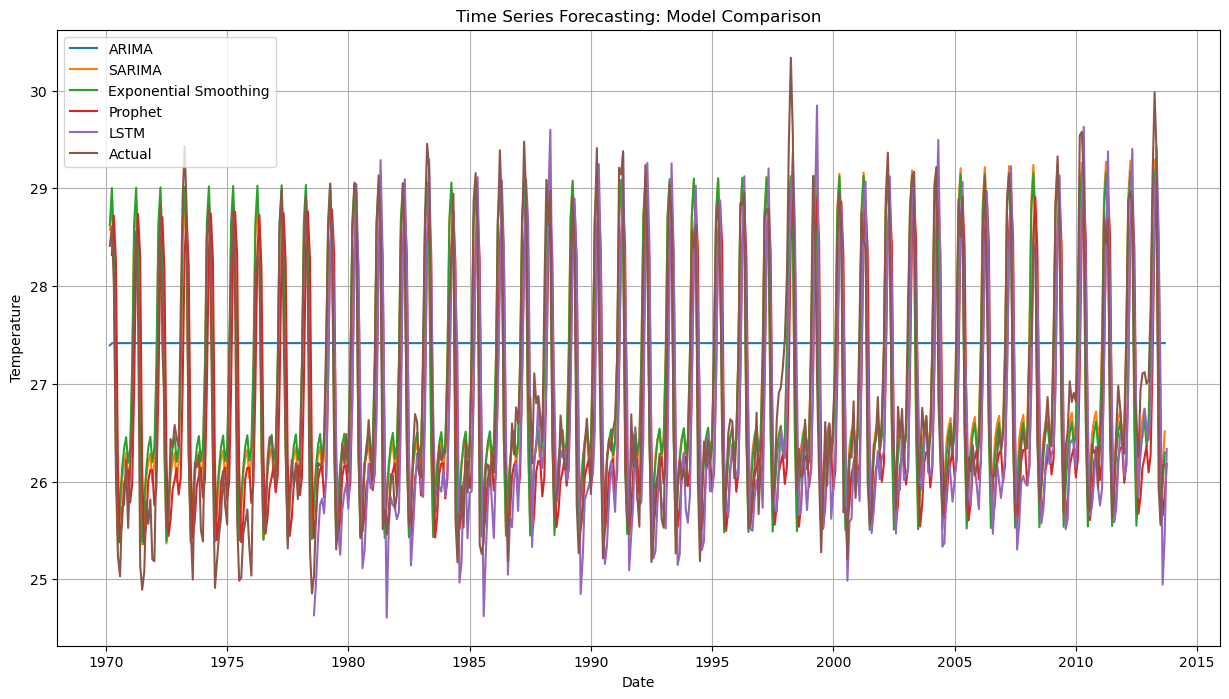

In [187]:
plt.figure(figsize=(15,8))
plt.title('Time Series Forecasting: Model Comparison')
plt.plot(arima_forecast,label = 'ARIMA')
plt.plot(sarima_forecast,label = 'SARIMA')
plt.plot(exp_forecast, label = 'Exponential Smoothing')
plt.plot(prophet_forecast,label = 'Prophet')
plt.plot(forecast_df, label = 'LSTM')
plt.plot(test,label = 'Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

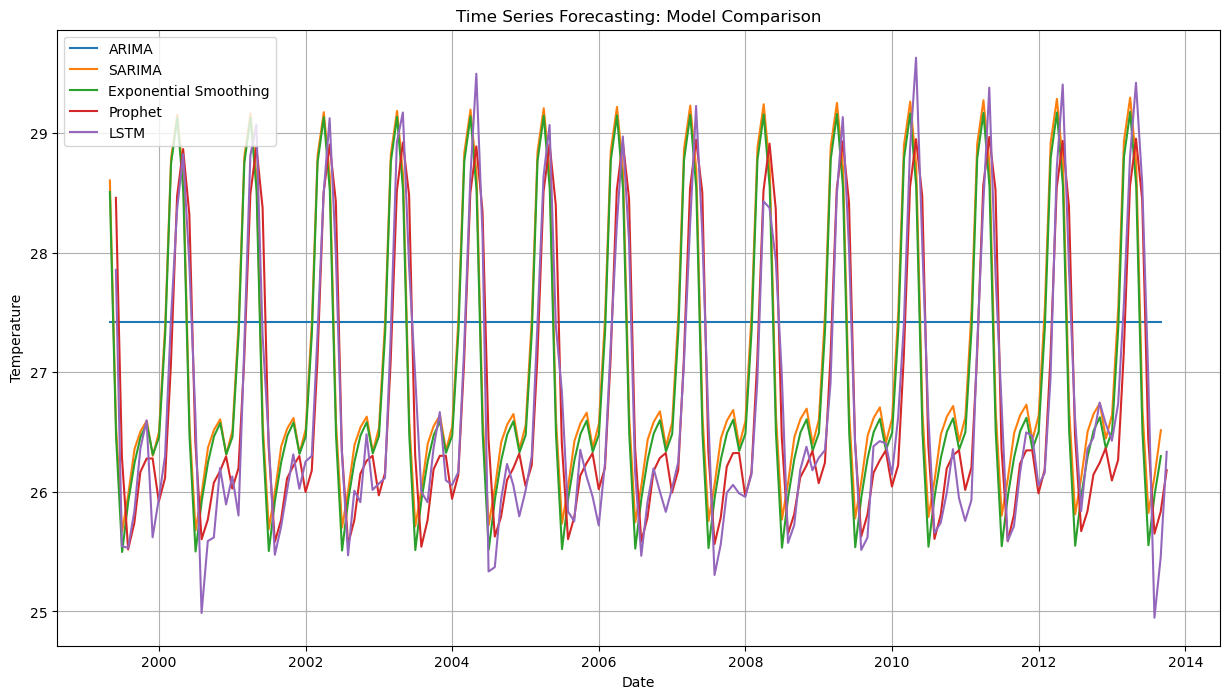

In [188]:
plt.figure(figsize=(15,8))
plt.title('Time Series Forecasting: Model Comparison')
plt.plot(arima_forecast[350:],label = 'ARIMA')
plt.plot(sarima_forecast[350:],label = 'SARIMA')
plt.plot(exp_forecast[350:], label = 'Exponential Smoothing')
plt.plot(prophet_forecast[350:],label = 'Prophet')
plt.plot(forecast_df[250:], label = 'LSTM')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

In [192]:
def evl(actual,predicted):

    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    smape = 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

    return {"MAE": mae, "RMSE": rmse, "sMAPE": smape}



di = {'ARIMA':arima_forecast,'SARIMAX':sarima_forecast,'Exp':exp_forecast,'Prophet':prophet_forecast,}

In [ ]:
results = {}
for name, preds in di.items():
    preds = preds[:len(test)] 
    results[name] = evl(test, preds)

results['LSTM'] = evl(y_test_actual,forecast_df)

metrics_df = pd.DataFrame(results).T  

print(metrics_df)


              MAE      RMSE     sMAPE
ARIMA    1.220427  1.339976  4.509540
SARIMAX  0.307006  0.405434  4.745790
Exp      0.324530  0.427740  4.755599
Prophet  0.339657  0.434053  1.262331
LSTM     0.395257  0.498575  1.469043


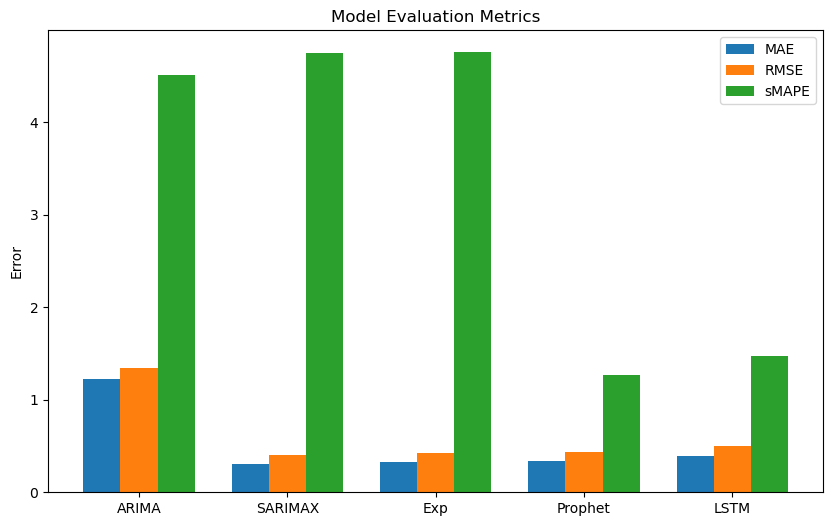

In [200]:
metrics_long = metrics_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")
metrics_long.rename(columns={"index": "Model"}, inplace=True)

plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics_df.columns):
    plt.bar(
        [x + i*0.25 for x in range(len(metrics_df))],  
        metrics_df[metric],
        width=0.25,
        label=metric
    )

plt.xticks([x + 0.25 for x in range(len(metrics_df))], metrics_df.index)
plt.ylabel("Error")
plt.title("Model Evaluation Metrics")
plt.legend()
plt.show()